In [3]:
import matplotlib.pyplot as plt
import sys
import functions as myf
import numpy as np
import h5py
import networkx as nx
import scipy


def distribution (d, step):
    d = [int(i) for i in d]
    d_c = sorted(myf.log_binning_dist(step,d))
    x,y = zip(*d_c)
    return [x,y]



options = {
    'node_color': 'black',
    'node_size': 8,
    'width': 1,
}
fonts = 14


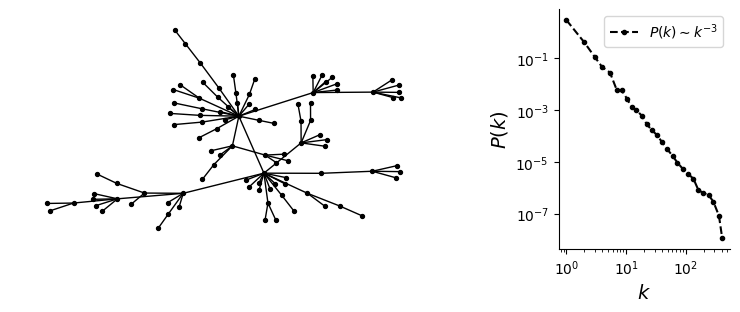

In [65]:

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 2]}, figsize=(9, 3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

data = h5py.File("../../aging_model/results/M1/L1/N100_M1_L1_beta1.0_alpha0.0.hdf5", "r")
network = list(np.array(data["net_1"]))
G = nx.Graph()
G = nx.from_edgelist(network)
nx.draw(G, **options, ax=ax[0])

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

degree = np.loadtxt("../../aging_model/degree/M1/L1/degree_N10000_M1_L1_beta1.0_alpha0.0.txt")
deg_lb = distribution(degree, 0.2)
ax[1].loglog(deg_lb[0], deg_lb[1], '--.', color="black", label=r"$P(k) \sim k^{-3}$")
plt.xlabel(r"$k$", fontsize=fonts)
plt.ylabel(r"$P(k)$", fontsize=fonts)
plt.legend()
plt.savefig("BAmodel.pdf", bbox_inches="tight", dpi=200)

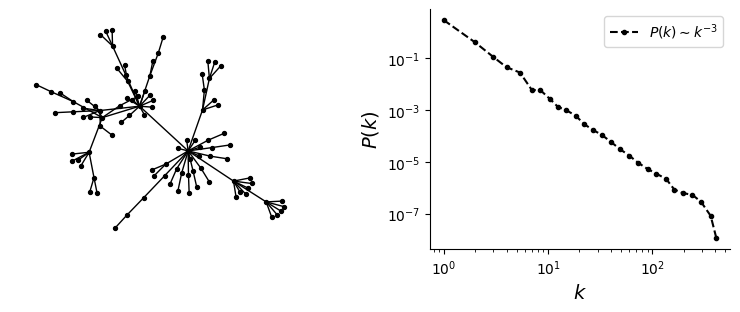

In [33]:
fig = plt.figure(figsize=(9, 3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

ax = plt.subplot(121)


data = h5py.File("../../aging_model/results/M1/L1/N100_M1_L1_beta1.0_alpha0.0.hdf5", "r")
network = list(np.array(data["net_1"]))
G = nx.Graph()
G = nx.from_edgelist(network)
nx.draw(G, **options)



ax = plt.subplot(122)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

degree = np.loadtxt("../../aging_model/degree/M1/L1/degree_N10000_M1_L1_beta1.0_alpha0.0.txt")
deg_lb = distribution(degree, 0.2)
plt.loglog(deg_lb[0], deg_lb[1], '--.', color="black", label=r"$P(k) \sim k^{-3}$")
plt.xlabel(r"$k$", fontsize=fonts)
plt.ylabel(r"$P(k)$", fontsize=fonts)
plt.legend()


plt.savefig("BAmodel.pdf", bbox_inches="tight", dpi=200)